# Ujian Modul 3
## Rahman Fitra Perdana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
churn = pd.read_csv('Churn_ujian.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
churn.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,1166-PQLGG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [6]:
churn2=churn.copy()
dataFeatures=churn2.columns
dataType=[]
null=[]
nullPct=[]
unique=[]
uniqueSample=[]
for i in dataFeatures:
    dataType.append(churn2[i].dtypes)
    null.append(churn2[i].isna().sum())
    nullPct.append((churn2[i].isna().sum()/len(churn2[i]))*100)
    unique.append(churn2[i].nunique())
    uniqueSample.append(churn2[i].drop_duplicates().sample(2).values)
new_churn2=pd.DataFrame(zip(dataFeatures,dataType,null,nullPct,unique,uniqueSample),columns=['dataFeatures','dataType', 'null','nullPct','unique','uniqueSample'])
new_churn2=new_churn2.round(2)
new_churn2

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[0378-XSZPU, 5018-GWURO]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[4, 65]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[Yes, No phone service]"
8,InternetService,object,0,0.0,3,"[No, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes]"


In [7]:
churn[churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Question 1
In your opinion, Why this datas filled with empty String? Is it related with another column?

In [8]:
churn[churn['Dependents']=='Yes'].index

Int64Index([   6,    9,   10,   15,   17,   18,   24,   26,   27,   29,
            ...
            6989, 6992, 6994, 6995, 6996, 7018, 7020, 7038, 7039, 7040],
           dtype='int64', length=2110)

In [9]:
churn[churn['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

# Answer 1
Berdasarkan data tersebut, customerID yang mempunyai TotalCharges berisikan String kosong kemungkinan adalah **customerID yang mendaftar tapi tidak sampai satu bulan selesai karena tenure nya yang masih nol dan churn nya yang berisi *No* semua**

In [10]:
idx = churn[churn['TotalCharges']==' '].index
for i in idx:
    churn.at[idx, 'TotalCharges'] = 0
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'])

In [11]:
churn.iloc[idx]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [12]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
churn[churn['PaymentMethod'] == 'Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No


Text(0.5, 1.0, 'Mailed Check Payment Method grouped by Partner')

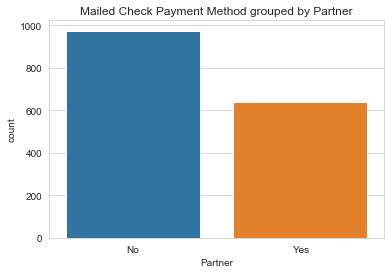

In [14]:
sns.set_style('whitegrid')
sns.countplot(x = 'Partner', data=churn[churn['PaymentMethod'] == 'Mailed check'])
plt.title('Mailed Check Payment Method grouped by Partner')

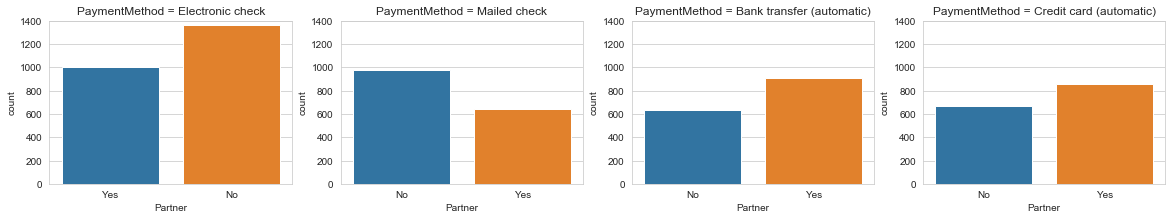

In [15]:
plt.figure(figsize=(20,3))
pmt = churn['PaymentMethod'].unique()
for i,j in zip(range(1,5), pmt):
    plt.subplot(1,4,i)
    sns.set_style('whitegrid')
    sns.countplot(x = 'Partner', data=churn[churn['PaymentMethod'] == j])
    plt.title('PaymentMethod = {}'.format(j))
    plt.ylim(0,1400)

In [16]:
churn[churn['PaymentMethod'] == 'Electronic check']['Partner'].value_counts()

No     1362
Yes    1003
Name: Partner, dtype: int64

Text(0.5, 1.0, 'Tenure distribution with Mailed Check Payment Method')

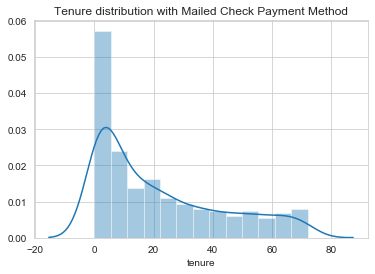

In [17]:
sns.set_style('whitegrid')
sns.distplot(churn[churn['PaymentMethod'] == 'Mailed check']['tenure'])
plt.title('Tenure distribution with Mailed Check Payment Method')

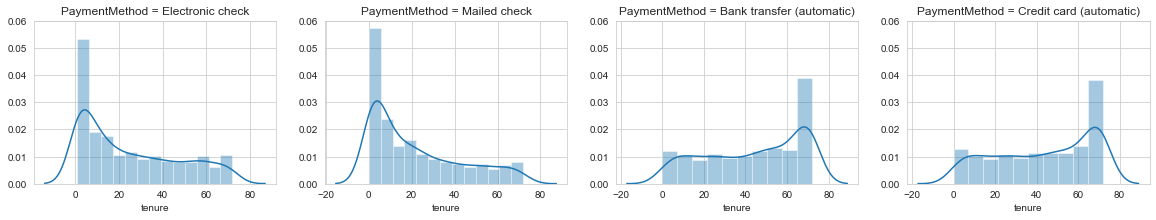

In [18]:
plt.figure(figsize=(20,3))
pmt = churn['PaymentMethod'].unique()
for i,j in zip(range(1,5), pmt):
    plt.subplot(1,4,i)
    sns.set_style('whitegrid')
    sns.distplot(churn[churn['PaymentMethod'] == j]['tenure'])
    plt.title('PaymentMethod = {}'.format(j))
    plt.ylim(0,0.06)

# Question 2
From the plot above, what could you conclude about people who paid via mailed check? Also. is there any relationship between the tenure and partner column with the payment method?

In [19]:
mck = churn.groupby('PaymentMethod').mean()
mck

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,,
Bank transfer (automatic),0.150907,43.656736,67.192649,3075.310816
Credit card (automatic),0.145204,43.269382,66.512385,3069.378022
Electronic check,0.251163,25.174630,76.255814,2090.868182
Mailed check,0.058313,21.830025,43.917060,1049.250744


In [20]:
churn[churn['PaymentMethod'] == 'Mailed check'].describe(exclude='number').T

,count,unique,top,freq
customerID,1612,1612,9033-EOXWV,1
gender,1612,2,Male,834
Partner,1612,2,No,974
Dependents,1612,2,No,1049
PhoneService,1612,2,Yes,1453
MultipleLines,1612,3,No,1105
InternetService,1612,3,No,741
OnlineSecurity,1612,3,No internet service,741
OnlineBackup,1612,3,No internet service,741
DeviceProtection,1612,3,No internet service,741


# Answer 2

Berdasarkan grafik diatas, **customerID** yang membayar **(PaymentMethod)** melalui **Mailed Check** atau **Electronic check** adalah mereka yang kebanyakan mempunyai **tenure** sekitar 0-5 bulan dan semakin lama waktu **tenure** nya maka cenderung akan berpindah ke **Bank transfer** atau **Credit card**. Selain itu, terlihat pula bahwa **customerID** yang mebayar melalui **Mailed Check** atau **Electronic check** mayoritasnya tidak mempunyai **Partner**. Lalu saya mencoba untuk membuat groupby berdasarkan **PaymentMethod** dengan berisi rata-rata nilai **SeniorCitizen**, **tenure**, **MonthlyCharges**, dan **TotalCharges**. Hasilnya terlihat seperti ada tiga kelompok yang berbeda, yaitu **customerID** yang membayar melalui **Bank transfer** dan **Credit Card** mempunyai nilai rata-rata di tiap fitur yang cenderung mirip. Namun, perbedaan terlihat pada fitur pembayaran melalui **Electronic check** dan **Mailed check**. Terlihat perbedaan yang cukup jelas di tiap fiturnya. Oleh karena itu, saya berkesimpulan bahwa kemungkinan **customerID** yang membayar melalui **Mailed check** merupakan tipe orang yang cenderung lebih muda, mempunyai pendapatan yang tidak terlalu tinggi, dan masih tergolong baru menggunakan layanan tersebut.

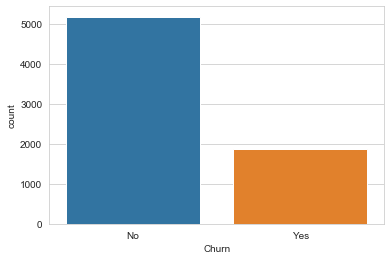

In [21]:
sns.set_style('whitegrid')
sns.countplot(x = 'Churn', data=churn)

In [69]:
def sencit(df):
    if df['SeniorCitizen'] == 0:
        return 'No'
    else:
        return 'Yes'
def turn_churn(df):
    if df['Churn'] == 'No':
        return 0
    else:
        return 1

In [23]:
churn2 = churn.copy()
churn2['SeniorCitizen'] = churn2.apply(sencit, axis=1)
churn2.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [24]:
categorical_columns = churn2.select_dtypes('object').columns[1:17]
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

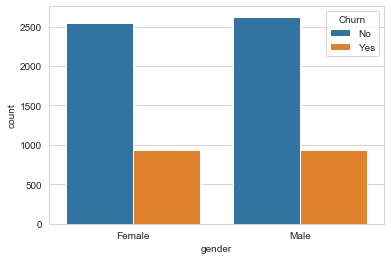

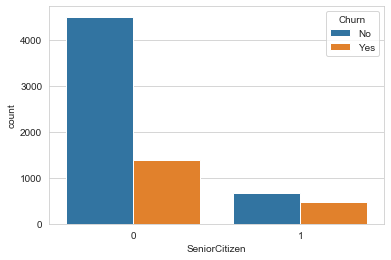

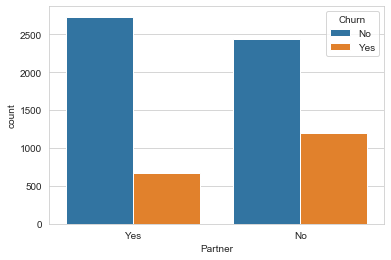

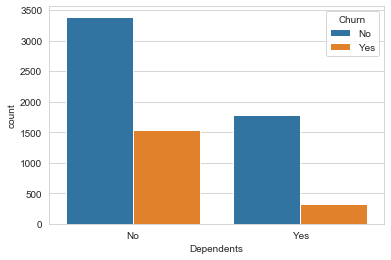

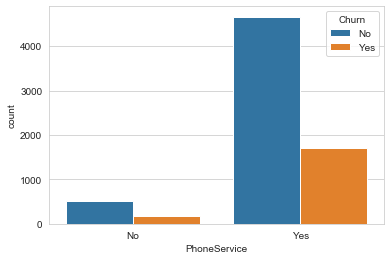

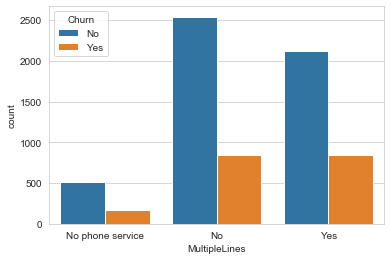

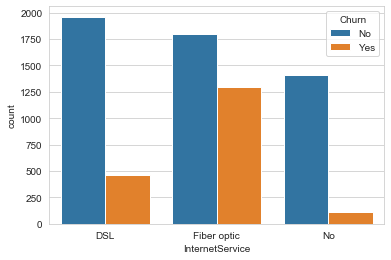

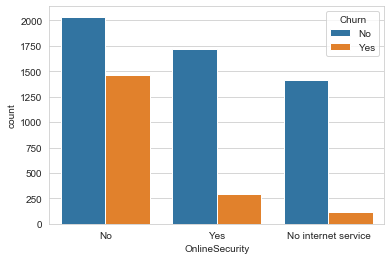

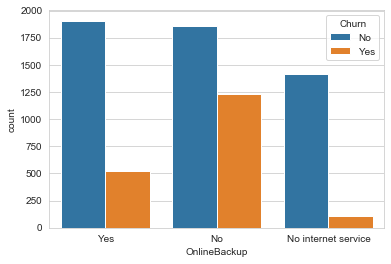

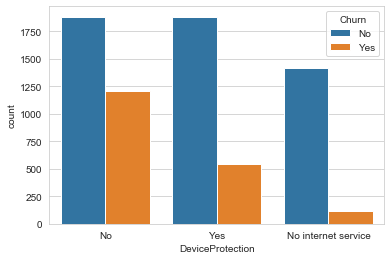

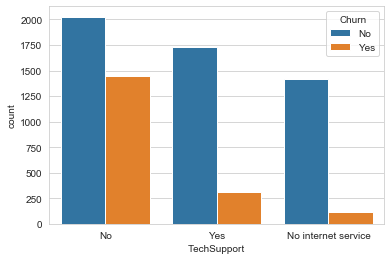

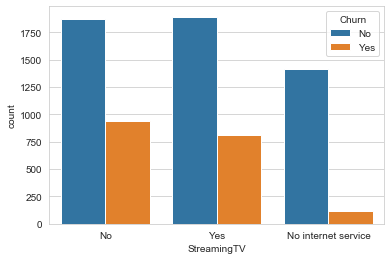

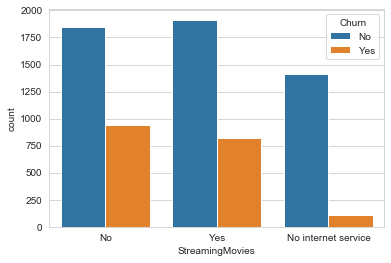

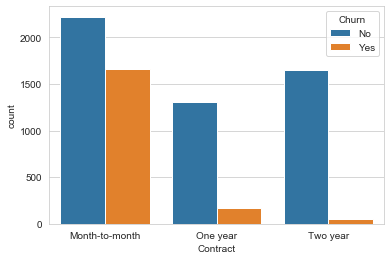

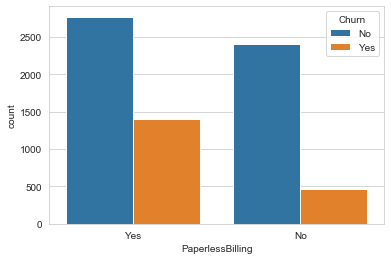

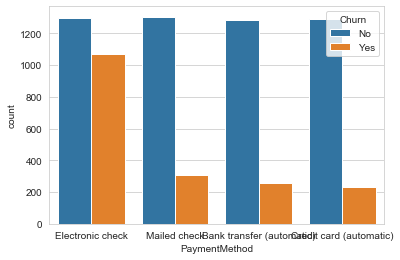

In [25]:
for i in categorical_columns:
    sns.set_style('whitegrid')
    sns.countplot(x = i, data=churn, hue='Churn')
    plt.show()

In [26]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

In [27]:
numerical_columns = churn2.select_dtypes('number').columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

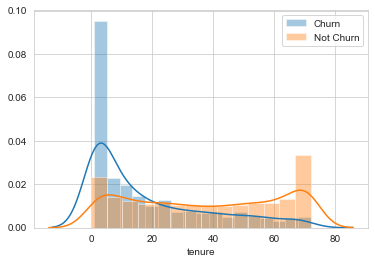

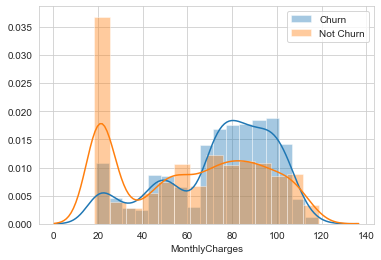

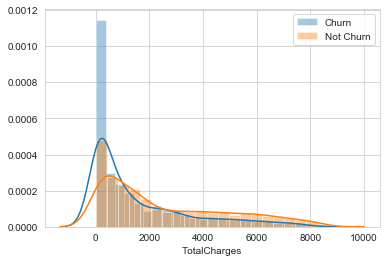

In [28]:
for i in numerical_columns:
    sns.set_style('whitegrid')
    sns.distplot(churn2[churn2['Churn'] == 'Yes'][i], label = 'Churn')
    sns.distplot(churn2[churn2['Churn'] == 'No'][i], label = 'Not Churn')
    plt.legend()
    plt.show()

# Question 3
Is there any interesting insight that you could find from the plot above?

# Answer 3
Berdasarkan hasil perbandingan fitur **Churn** antara **Yes** atau **No**, terdapat beberapa fitur penting yang menurut saya cukup berpengaruh untuk menentukan apakah **customerID** keluar atau tidak, yaitu: 
- Kategorikal
    - **Internet Service** - **Fiber Optic**
    - **Online Security** - **No**
    - **Online Backup** - **No**
    - **Device Protection** - **No**
    - **Tech Support** - **No**
    - **Contract** - **Month-to-Month**
    - **Payment Method** - **Electronic check**
- Numerikal
    - **tenure**
    - **MonthlyCharges**
    - **TotalCharges**

Untuk fitur kategorikal, saya menganggap fitur tersebut cukup penting karena perbandingan dari subfitur **Fiber Optic** yang **Churn** terhadap yang **Not Churn** hampir 1:1 dan selalu melebihi 0,5:1. Selain itu, berdasarkan fitur numerikal terdapat keanehan dimana fitur **MonthlyCharges** yang mempunyai nilai tinggi (70-110) justru mayoritasnya adalah **Churn**. Menurut saya, hal dapat memperlihatkan bahwa kemungkinan layanan yang cukup mahal tidak sebanding dengan harganya yang ditunjukkan bahwa cukup banyak **customerID** yang **Churn**.

In [29]:
churn2[(churn2['MonthlyCharges'] >= 60) & (churn2['MonthlyCharges'] <= 120) & (churn2['Churn'] == 'Yes')].describe(exclude='number').T

,count,unique,top,freq
customerID,1380,1380,9033-EOXWV,1
gender,1380,2,Female,713
SeniorCitizen,1380,2,No,976
Partner,1380,2,No,842
Dependents,1380,2,No,1151
PhoneService,1380,2,Yes,1379
MultipleLines,1380,3,Yes,808
InternetService,1380,2,Fiber optic,1297
OnlineSecurity,1380,2,No,1155
OnlineBackup,1380,2,No,939


In [36]:
churn3=churn2.copy()
churn3.drop(['customerID', 'Churn'], axis=1, inplace=True)
churn4 = pd.get_dummies(data=churn3, drop_first=True, columns=categorical_columns)
churn4.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [37]:
churn4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_Yes                        7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

# Unsupervised Modeling

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

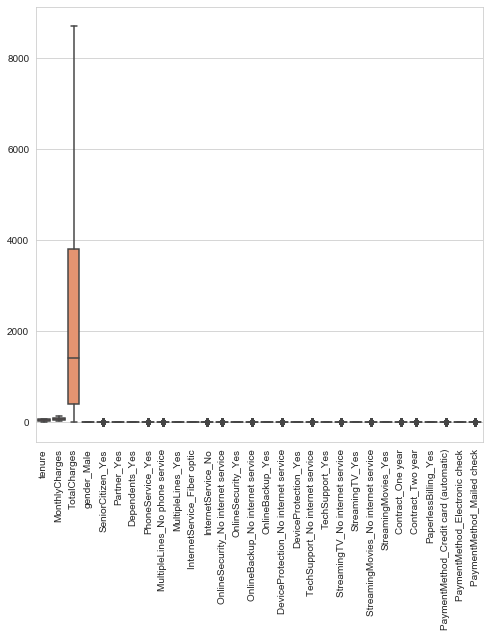

In [41]:
plt.figure(figsize=(8,8))
sns.boxplot(data=churn4)
plt.xticks(rotation=90)

In [42]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()

In [43]:
churn4 = pd.DataFrame(standard.fit_transform(churn4), columns = churn4.columns, index = churn4.index)
churn4.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,0.066327,-0.259629,-0.172165,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-1.236724,-0.362660,-0.958066,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,0.514251,-0.746535,-0.193672,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-1.236724,0.197365,-0.938874,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

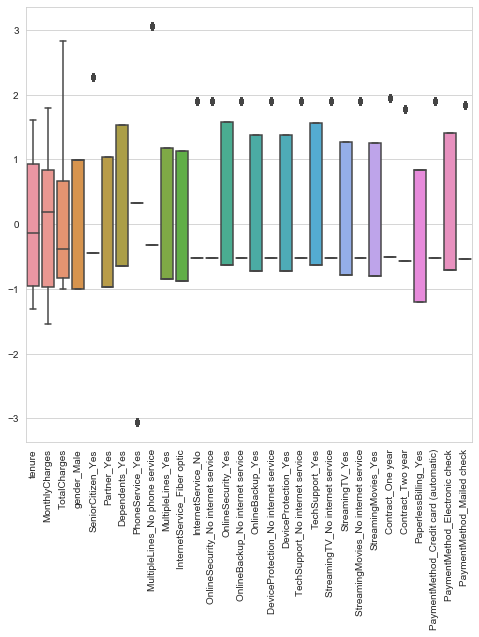

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(data=churn4)
plt.xticks(rotation=90)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=101)
pca.fit(churn4)
x_pca = pca.transform(churn4)

In [61]:
churn_pca = pd.DataFrame(x_pca, columns = ['PC{}'.format(i) for i in range(1,3)])
churn_pca

,PC1,PC2
0,-0.432402,-3.150994
1,-0.204024,-0.794405
2,-0.160382,-2.089736
3,-0.898671,-0.878803
4,-0.613839,-3.175062
...,...,...
7038,-1.895955,1.301241
7039,-3.132402,3.147387
7040,-0.342003,-2.486628
7041,-0.616559,-2.049118


In [62]:
pca.explained_variance_ratio_

array([0.33179753, 0.11983851])

In [70]:
# churn_pca['Churn'] = churn2.apply(lambda x: 0 if x[x['Churn']=='No'] else 1, axis=1)
churn_pca['Churn'] = churn2.apply(turn_churn, axis=1)
churn_pca.head()

,PC1,PC2,Churn
0,-0.432402,-3.150994,0
1,-0.204024,-0.794405,0
2,-0.160382,-2.089736,1
3,-0.898671,-0.878803,0
4,-0.613839,-3.175062,1


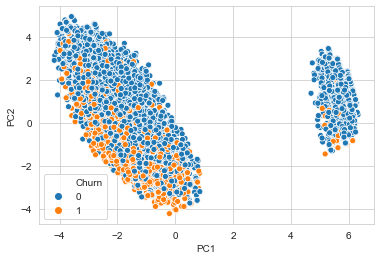

In [71]:
sns.scatterplot(x='PC1', y='PC2', data= churn_pca, hue='Churn')

In [72]:
# K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=101)
kmeans.fit(churn_pca[['PC1', 'PC2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [86]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 0.40, min_samples = 2).fit(churn_pca[['PC1', 'PC2']])
dfDBSCAN = churn_pca.copy()
dfDBSCAN['Category'] = dbscan.labels_

In [88]:
# HDBSCAN
from hdbscan import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size = 2, min_samples = 25)
hdbscan.fit(churn_pca[['PC1', 'PC2']])
dfHDBSCAN = churn_pca.copy()
dfHDBSCAN['Category'] = hdbscan.labels_

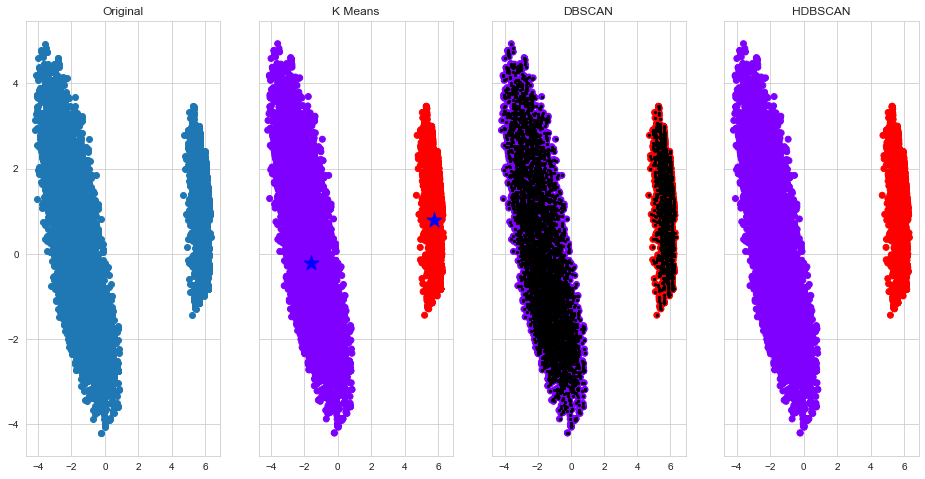

In [90]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,8))

ax1.set_title('Original')
ax1.scatter(churn_pca['PC1'], churn_pca['PC2'])

centroids = kmeans.cluster_centers_
ax2.set_title('K Means')
ax2.scatter(churn_pca['PC1'], churn_pca['PC2'], c = kmeans.labels_, cmap='rainbow')
ax2.scatter(centroids[:,0], centroids[:,1], marker = '*', c='b', s=250)

core= dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(churn_pca['PC1'], churn_pca['PC2'], c= dfDBSCAN['Category'], cmap = 'rainbow')
ax3.scatter(core[:,0], core[:,1], marker='o', c='black', s=5)

ax4.set_title('HDBSCAN')
ax4.scatter(dfHDBSCAN['PC1'], dfHDBSCAN['PC2'], c=dfHDBSCAN['Category'], cmap='rainbow')

In [123]:
churn3['Churn'] = churn2.apply(turn_churn, axis=1)
churn3['k-label'] = kmeans.labels_
churn3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,k-label,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,1


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

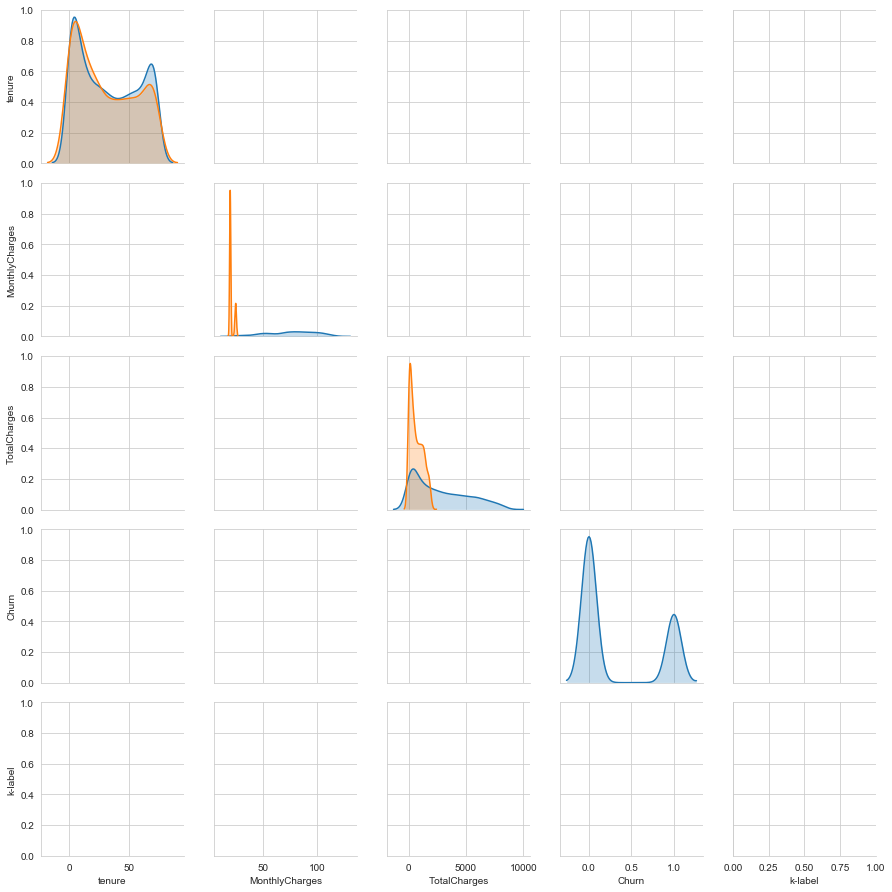

In [107]:
sns.pairplot(churn3[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'k-label']], hue="k-label")

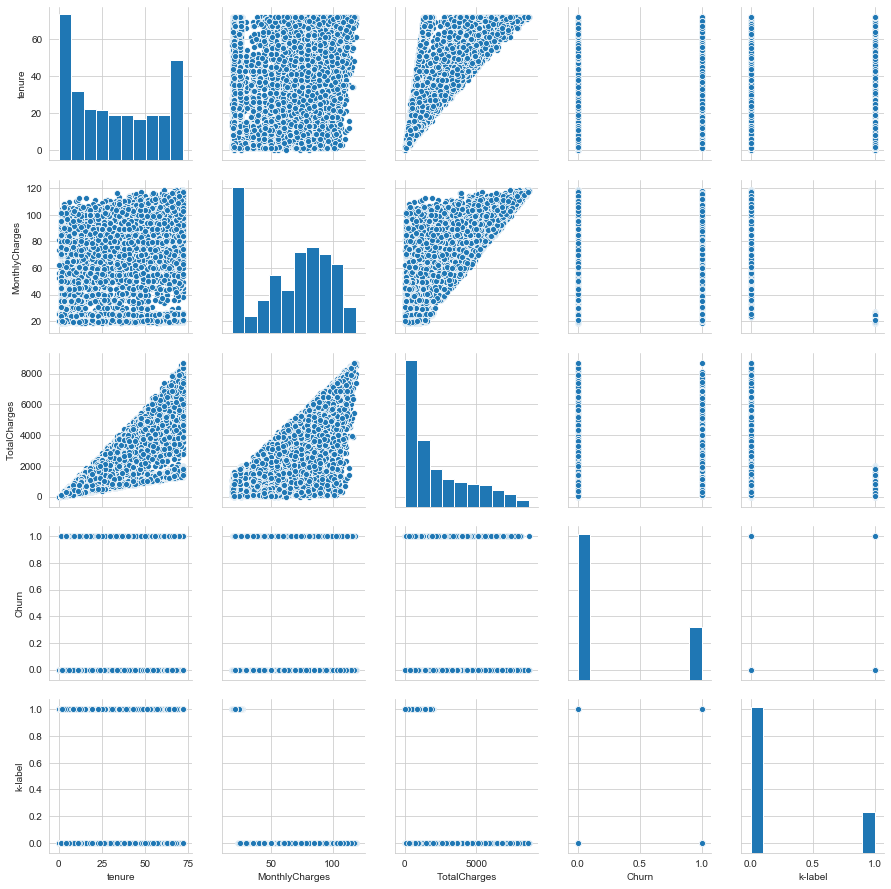

In [109]:
sns.pairplot(churn3[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'k-label']])

In [108]:
churn3['k-label'].describe()

count    7043.000000
mean        0.216669
std         0.412004
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: k-label, dtype: float64

# Question 4
Just strictly from the plot above, What kind of insight you could find there?

# Answer 4
Pembagian cluster terlihat cukup berbeda, yaitu:
- Cluster 0: **customerID** dengann **MonthlyCharges** dan **TotalCharges** yang cukup besar
- Cluster 1: **customerID** dengann **MonthlyCharges** dan **TotalCharges** yang rendah

# Supervised Modeling

In [131]:
from sklearn.model_selection import train_test_split #membagi data secara random menjadi train data dan test data
churn5 = churn3.copy()
target = churn5['Churn']
data = churn4
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.20, random_state=101)

In [132]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority')

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis =1)

In [133]:
# Normal X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 240 to 4959
Data columns (total 30 columns):
tenure                                   5634 non-null float64
MonthlyCharges                           5634 non-null float64
TotalCharges                             5634 non-null float64
gender_Male                              5634 non-null float64
SeniorCitizen_Yes                        5634 non-null float64
Partner_Yes                              5634 non-null float64
Dependents_Yes                           5634 non-null float64
PhoneService_Yes                         5634 non-null float64
MultipleLines_No phone service           5634 non-null float64
MultipleLines_Yes                        5634 non-null float64
InternetService_Fiber optic              5634 non-null float64
InternetService_No                       5634 non-null float64
OnlineSecurity_No internet service       5634 non-null float64
OnlineSecurity_Yes                       5634 non-null float64
OnlineBac

In [134]:
# Oversampled X_train
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 30 columns):
tenure                                   8296 non-null float64
MonthlyCharges                           8296 non-null float64
TotalCharges                             8296 non-null float64
gender_Male                              8296 non-null float64
SeniorCitizen_Yes                        8296 non-null float64
Partner_Yes                              8296 non-null float64
Dependents_Yes                           8296 non-null float64
PhoneService_Yes                         8296 non-null float64
MultipleLines_No phone service           8296 non-null float64
MultipleLines_Yes                        8296 non-null float64
InternetService_Fiber optic              8296 non-null float64
InternetService_No                       8296 non-null float64
OnlineSecurity_No internet service       8296 non-null float64
OnlineSecurity_Yes                       8296 non-null float64
OnlineBacku

# Question 5
This time, I would leave the supervised modelling for the Churn feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing.

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

# Answer 5
1. Saya memilih untuk mengoptimalkan nilai **f1-score** sehingga bisa mendapatkan nilai **precision** dan **recall** yang lebih baik.
2. Saya memilih 3 supervise model berikut:
    - Logistic Model -> Merupakan salah satu model klasifikasi yang cukup kuat apabila data yang digunakan cukup baik.
    - Random Forest Classifier -> Menurut saya merupakan salah satu model sederhana yang cukup kuat karena melibatkan banyak decision tree
    - XGBoost Classifier -> Salah satu ensemble model terbaik karena sudah mengoptimasi agar tidak mudah untuk overfitting
3. Untuk nomor 3 dan seterusnya sepertinya tidak selesai karena pembuatan model rfc dengan metode grid memakan waktu yang sangat lama (> 2 jam) karena terlalu banyak hyperparameter yang digunakan.

# Logistic Model

### Normal X_train

In [135]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb

array([[0.9696092 , 0.0303908 ],
       [0.5530593 , 0.4469407 ],
       [0.79966697, 0.20033303],
       ...,
       [0.9975576 , 0.0024424 ],
       [0.99202029, 0.00797971],
       [0.92432045, 0.07567955]])

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1026
           1       0.66      0.52      0.58       383

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [140]:
print('Matthews Corrcoef: {}'.format(matthews_corrcoef(y_test, predictions)))
print('Log Loss: {}'.format(log_loss(y_test, PredictProb)))

Matthews Corrcoef: 0.45703078398304847
Log Loss: 0.4302615195363729


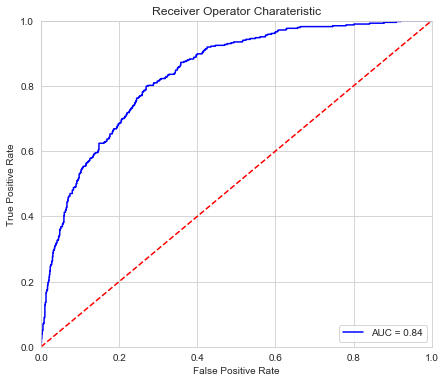

In [141]:
preds = PredictProb[:,1]
# ROC_AUC
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr,tpr)
# tpr = True Positive Rate = Sensitivity/Recall
# fpr = False Positive Rate = 1-tpr
# AUC = Area Under Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.title('Receiver Operator Charateristic')
plt.plot(fpr, tpr,'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc= 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Oversampled X_train

In [142]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(oversampled_trainX, oversampled_trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
predictions = logmodel.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb

array([[0.93901849, 0.06098151],
       [0.29131002, 0.70868998],
       [0.5854765 , 0.4145235 ],
       ...,
       [0.9967124 , 0.0032876 ],
       [0.9847334 , 0.0152666 ],
       [0.8412227 , 0.1587773 ]])

In [145]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1026
           1       0.53      0.76      0.62       383

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409



In [146]:
print('Matthews Corrcoef: {}'.format(matthews_corrcoef(y_test, predictions)))
print('Log Loss: {}'.format(log_loss(y_test, PredictProb)))

Matthews Corrcoef: 0.4606306023233169
Log Loss: 0.4843934767524689


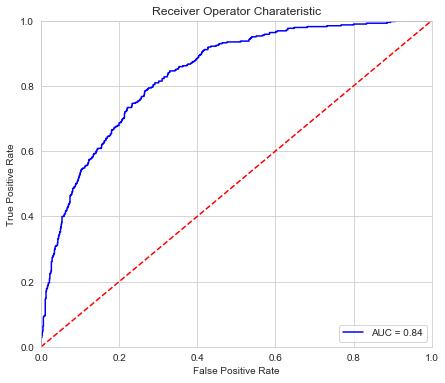

In [147]:
preds = PredictProb[:,1]
# ROC_AUC
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr,tpr)
# tpr = True Positive Rate = Sensitivity/Recall
# fpr = False Positive Rate = 1-tpr
# AUC = Area Under Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.title('Receiver Operator Charateristic')
plt.plot(fpr, tpr,'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc= 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Kesimpulan Logistic Regression
Berdasarkan hasil logistic regression terlihat pada saat memakai data X_train normal nilai f1-score untuk kategori 1 cukup rendah (0.58). Namun setelah ditambah di data train nya menggunakan SMOTE Oversampling, terlihat ada kenaikan untuk f1-score milik kategori 1 menjadi 0.62. Akan tetapi, terjadi penurunan yang cukup besar bagi f1-score milik kategori 0 dari 0.87 menjadi 0.81. Begitu pula dengan accuracy nya yang turun dari 0.8 menjadi 0.75. Sementara nilai log_loss nya pun naik dari 0.43 menjadi 0.48. Hal ini menunjukkan bukti awal bahwa data yang di oversampling tidak menjadi lebih bagus.

# Random Forest Classifier

### Normal X_train

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [149]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [150]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1026
           1       0.63      0.43      0.51       383

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [164]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every splot
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(10,110, num=11)]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV (estimator = rfc,
                                param_distributions = random_grid,
                                n_iter = 10,
                                cv = 3,
                                n_jobs = -1,
                                scoring = 'f1')

In [165]:
dict_cv = {}
best_score = []
for i in range(10):
    rf_random.fit(X_train, y_train)
    dict_cv['rf_random {}'.format(i)] = rf_random.best_params_
    best_score.append(rf_random.best_score_)

In [166]:
dict_cv

{'rf_random 0': {'n_estimators': 1400,
  'min_samples_split': 181,
  'min_samples_leaf': 40,
  'max_features': 'auto',
  'max_depth': 100,
  'bootstrap': True},
 'rf_random 1': {'n_estimators': 1000,
  'min_samples_split': 254,
  'min_samples_leaf': 60,
  'max_features': 'auto',
  'max_depth': 10,
  'bootstrap': False},
 'rf_random 2': {'n_estimators': 2000,
  'min_samples_split': 136,
  'min_samples_leaf': 40,
  'max_features': 'auto',
  'max_depth': 70,
  'bootstrap': True},
 'rf_random 3': {'n_estimators': 2000,
  'min_samples_split': 190,
  'min_samples_leaf': 20,
  'max_features': 'auto',
  'max_depth': None,
  'bootstrap': False},
 'rf_random 4': {'n_estimators': 1800,
  'min_samples_split': 154,
  'min_samples_leaf': 60,
  'max_features': 'sqrt',
  'max_depth': 100,
  'bootstrap': False},
 'rf_random 5': {'n_estimators': 1400,
  'min_samples_split': 245,
  'min_samples_leaf': 80,
  'max_features': 'sqrt',
  'max_depth': 80,
  'bootstrap': True},
 'rf_random 6': {'n_estimators': 

In [167]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator = rfc,
                      refit = 'f1',
                      param_grid = {'n_estimators': [1400, 1000, 2000, 1800, 800, 400],
                                    'bootstrap': [True, False],
                                    'min_samples_split': [181,254,136,190,154,245,236,218,118],
                                    'min_samples_leaf': [20,40,60,70,80,90,100,],
                                    'max_depth': [None, 10,100,70,20,80,90],
                                    'max_features': ['sqrt', 'auto']},
                      scoring = 'f1',
                      cv = 3,
                      n_jobs = -1)
# param_grid untuk menentukan model terbaik berdasarkan scoringnya

In [168]:
search.fit(X_train, y_train)

KeyboardInterrupt: 

### Oversampled X_train

In [169]:
dict_cv = {}
best_score = []
for i in range(3):
    rf_random.fit(oversampled_trainX, oversampled_trainY)
    dict_cv['rf_random {}'.format(i)] = rf_random.best_params_
    best_score.append(rf_random.best_score_)

In [170]:
dict_cv

{'rf_random 0': {'n_estimators': 1600,
  'min_samples_split': 172,
  'min_samples_leaf': 100,
  'max_features': 'auto',
  'max_depth': 20,
  'bootstrap': False},
 'rf_random 1': {'n_estimators': 1600,
  'min_samples_split': 654,
  'min_samples_leaf': 20,
  'max_features': 'sqrt',
  'max_depth': 50,
  'bootstrap': False},
 'rf_random 2': {'n_estimators': 600,
  'min_samples_split': 218,
  'min_samples_leaf': 90,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False}}

In [171]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator = rfc,
                      param_grid = {'n_estimators': [1600,600],
                                    'bootstrap': [False],
                                    'min_samples_split': [172,654,218],
                                    'min_samples_leaf': [100,20,90],
                                    'max_depth': [20,50],
                                    'max_features': ['sqrt', 'auto']},
                      scoring = 'f1',
                      cv = 3,
                      n_jobs = -1)
# Parameter diisi berdasarkan hasil random cv

In [172]:
search.fit(oversampled_trainX, oversampled_trainY)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [176]:
search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 172,
 'n_estimators': 600}

In [178]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=50, bootstrap='False', max_features='auto', min_samples_leaf=20,
                             min_samples_split=172)
rfc.fit(oversampled_trainX, oversampled_trainY)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=172,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
rfc_pred = rfc.predict(X_test)
rfc_predProb = rfc.predict_proba(X_test)
rfc_predProb

array([[0.79360302, 0.20639698],
       [0.23024592, 0.76975408],
       [0.50337427, 0.49662573],
       ...,
       [0.9789571 , 0.0210429 ],
       [0.9377894 , 0.0622106 ],
       [0.82913951, 0.17086049]])

In [180]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1026
           1       0.56      0.69      0.62       383

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



# XGBOOST

### Normal X_train

In [181]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()

In [182]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every splot
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(10,110, num=11)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

learning_rate = [int(x) for x in np.linspace(0.01, 0.5, num=10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'learning_rate': learning_rate}

rf_random = RandomizedSearchCV (estimator = xgboost,
                                param_distributions = random_grid,
                                n_iter = 10,
                                cv = 3,
                                n_jobs = -1,
                                scoring = 'f1')

In [183]:
dict_cv = {}
best_score = []
for i in range(10):
    rf_random.fit(X_train, y_train)
    dict_cv['rf_random {}'.format(i)] = rf_random.best_params_
    best_score.append(rf_random.best_score_)
# Salah lihat iterasi, harusnya 3 tapi ternyata masih 10 sehingga lama saat modelingnya

In [184]:
dict_cv

{'rf_random 0': {'n_estimators': 1200,
  'min_samples_split': 881,
  'min_samples_leaf': 30,
  'max_features': 'auto',
  'max_depth': 20,
  'learning_rate': 0,
  'bootstrap': True},
 'rf_random 1': {'n_estimators': 1000,
  'min_samples_split': 918,
  'min_samples_leaf': 30,
  'max_features': 'auto',
  'max_depth': 100,
  'learning_rate': 0,
  'bootstrap': True},
 'rf_random 2': {'n_estimators': 400,
  'min_samples_split': 590,
  'min_samples_leaf': 100,
  'max_features': 'auto',
  'max_depth': 20,
  'learning_rate': 0,
  'bootstrap': True},
 'rf_random 3': {'n_estimators': 1000,
  'min_samples_split': 263,
  'min_samples_leaf': 20,
  'max_features': 'auto',
  'max_depth': 40,
  'learning_rate': 0,
  'bootstrap': True},
 'rf_random 4': {'n_estimators': 800,
  'min_samples_split': 718,
  'min_samples_leaf': 90,
  'max_features': 'auto',
  'max_depth': 100,
  'learning_rate': 0,
  'bootstrap': True},
 'rf_random 5': {'n_estimators': 200,
  'min_samples_split': 109,
  'min_samples_leaf': 8

In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator = rfc,
                      refit = 'f1',
                      param_grid = {'n_estimators': [],
                                    'bootstrap': [True, False],
                                    'min_samples_split': [],
                                    'min_samples_leaf': [],
                                    'max_depth': [],
                                    'max_features': ['sqrt', 'auto']},
                      scoring = 'f1',
                      cv = 3,
                      n_jobs = -1)
# Parameter diisi berdasarkan hasil random cv
# Tidak menjalankan gridcv karena keterbatasan waktu, tapi seharusnya data didapat berdasarkan grid hasil random cv

In [185]:
xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 2000, max_depth = 70, 
                        min_samples_split = 118, min_samples_leaf=70, n_jobs = -1,
                        max_features='sqrt', bootstrap='False')

In [190]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, bootstrap='False',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.01,
              max_delta_step=0, max_depth=70, max_features='sqrt',
              min_child_weight=1, min_samples_leaf=70, min_samples_split=118,
              missing=nan, monotone_constraints=None, n_estimators=2000,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False, ...)

In [191]:
print(classification_report(y_test, xgboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1026
           1       0.58      0.43      0.50       383

    accuracy                           0.76      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



### Oversampled X_train

In [ ]:
dict_cv = {}
best_score = []
for i in range(5):
    rf_random.fit(oversampled_trainX, oversampled_trainY)
    dict_cv['rf_random {}'.format(i)] = rf_random.best_params_
    best_score.append(rf_random.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator = rfc,
                      refit = 'f1',
                      param_grid = {'n_estimators': [],
                                    'bootstrap': [True, False],
                                    'min_samples_split': [],
                                    'min_samples_leaf': [],
                                    'max_depth': [],
                                    'max_features': ['sqrt', 'auto']},
                      scoring = 'f1',
                      cv = 3,
                      n_jobs = -1)
# Parameter diisi berdasarkan hasil random cv

In [ ]:
search.fit(oversampled_trainX, oversampled_trainY)

# Feature Importance

In [192]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

C:\Users\Rahmanfp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Rahmanfp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 2000, max_depth = 70, 
                        min_samples_split = 118, min_samples_leaf=70, n_jobs = -1,
                        max_features='sqrt', bootstrap='False') # Model yang akan digunakan
xgboost.fit(X_train, y_train) # Data yang akan digunakan
perm = PermutationImportance(xgboost, scoring='f1', random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

In [ ]:
rfc.fit(oversampled_trainX, oversampled_trainY)
perm = PermutationImportance(rfc, scoring='roc_auc', random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names=list(X_test.columns))

# K-Fold

In [ ]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    logmodel = XGBClassifier()
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [ ]:
for i, tr_err, val_err in zip(list(range(1,6,1)), train_errors, validation_errors):
    print(('ROC AUC Train ke {} : {}'.format(i, tr_err['roc'])))
    print(('ROC AUC Validation ke {} : {}'.format(i, val_err['roc'])))

In [ ]:
for i, tr_err, val_err in zip(list(range(1,6,1)), train_errors, validation_errors):
    print(('Accuracy Train ke {} : {}'.format(i, tr_err['accuracy'])))
    print(('Accuracy Validation ke {} : {}'.format(i, val_err['accuracy'])))

In [ ]:
for i, tr_err, val_err in zip(list(range(1,6,1)), train_errors, validation_errors):
    print(f'Report Train ke {i} :')
    print((tr_err['report']))
    print(f'Report Validation ke {i} :')
    print((val_err['report']))

In [ ]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                   j['roc'], i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 
                                              'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                       'Test Matthews Corr Coef' , 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')    
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation